In [1]:
import polars as pl
import seaborn as sns

import matplotlib.pyplot as plt
from src.config import DirectoryPaths
from src.matplotlib import Color, Styles

plt.style.use(Styles.CMR10.value)

2025-08-29 16:39:04.078 | INFO     | src.config:<module>:26 - Loaded environment variables from /home/iragca/Documents/github/DS412-Time-Series-Analysis-and-Stochastic-Processes/.env
2025-08-29 16:39:04.079 | INFO     | src.config:<module>:49 - PROJECT_ROOT: /home/iragca/Documents/github/DS412-Time-Series-Analysis-and-Stochastic-Processes
2025-08-29 16:39:04.079 | INFO     | src.config:<module>:50 - DATA_DIR: /home/iragca/Documents/github/DS412-Time-Series-Analysis-and-Stochastic-Processes/data
2025-08-29 16:39:04.080 | INFO     | src.matplotlib.color:<module>:103 - Accessible color palette inspired by https://github.com/mpetroff/accessible-color-cycles.


# Reading Data

### Data Source and Description

<u>**ERA5 post-processed daily statistics on single levels from 1940 to present**</u>

This data was obtained from the [Copernicus Climate Data Store](https://cds.climate.copernicus.eu/datasets/derived-era5-single-levels-daily-statistics?tab=overview) (CDS) as part of previous coursework, which has now been repurposed for this case study.

The data mainly consists of precomputed daily average temperatures in Kelvin (K) from 1940 to 2024.


| Column      | Description                                                                 |
|-------------|-----------------------------------------------------------------------------|
| temp_year   | Years as Anno Domini of the Gregorian Calendar                              |
| temp_month  | Months of the Gregorian Calendar, 1 being January, and 12 being December    |
| temp_day    | Days in the Months of the Gregorian Calendar                                |
| avg_temp    | Daily averages of 2 meter global average temperature                        |


[Digital Object Identifier](https://doi.org/10.24381/cds.4991cf48)

In [2]:
temp_data = pl.read_parquet(DirectoryPaths.EXTERNAL_DATA.value / "era5-2m-temperature-global-daily-avg.parquet")
temp_data

temp_year,temp_month,temp_day,avg_temp
i64,i64,i64,f64
1940,1,2,276.007051
1940,1,3,275.975732
1940,1,4,275.934177
1940,1,5,275.893011
1940,1,6,275.7141
…,…,…,…
2024,12,27,278.369356
2024,12,28,278.28687
2024,12,29,278.242523


# Data Exploration

In [5]:
from src.utils import ensure_path
PLOTS = DirectoryPaths.FIGURES_DIR.value / "plots"
ensure_path(PLOTS)

Directory not found. Created it instead: /home/iragca/Documents/github/DS412-Time-Series-Analysis-and-Stochastic-Processes/figures/plots


PosixPath('/home/iragca/Documents/github/DS412-Time-Series-Analysis-and-Stochastic-Processes/figures/plots')

## Daily Average Temperature (1940-2024)

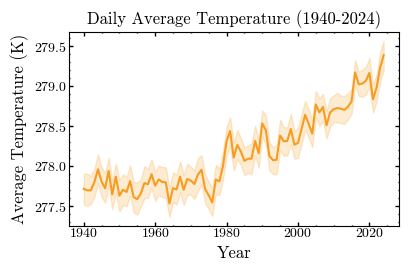

In [16]:
sns.lineplot(data=temp_data, x="temp_year", y="avg_temp",
    color=Color.ORANGE.value)
plt.title("Daily Average Temperature (1940-2024)")
plt.xlabel("Year")
plt.ylabel("Average Temperature (K)")

plt.savefig(
    PLOTS / "daily-average-temperature-1940-2024.png", 
    dpi=300,
    transparent=True, 
    bbox_inches="tight"
    )

## Monthly Average Temperature (1940-2024)

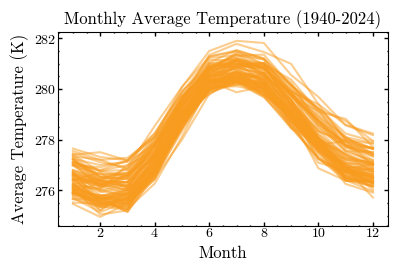

In [12]:
monthly_temp = temp_data.group_by(
    ["temp_year", "temp_month"]
    ).agg(pl.col("avg_temp").mean())

for year in range(1940, 2025):
    sns.lineplot(
        data=monthly_temp.filter(pl.col("temp_year") == year), 
        x="temp_month", 
        y="avg_temp", 
        color=Color.ORANGE.value, 
        alpha=0.5, 
        legend=None
        )

plt.title("Monthly Average Temperature (1940-2024)")
plt.xlabel("Month")
plt.ylabel("Average Temperature (K)")

plt.savefig(
    PLOTS / "monthly-average-temperature-1940-2024_dpi-900.png", 
    dpi=900, 
    transparent=True, 
    bbox_inches="tight"
    )

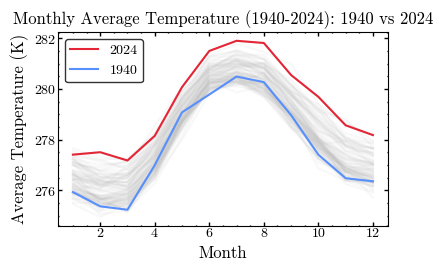

In [14]:
monthly_temp = temp_data.group_by(
    ["temp_year", "temp_month"]
    ).agg(pl.col("avg_temp").mean())

for year in range(1940, 2025):
    sns.lineplot(
        data=monthly_temp.filter(pl.col("temp_year") == year), 
        x="temp_month", 
        y="avg_temp", 
        color=Color.LIGHT_GRAY.value, 
        alpha=0.1, 
        legend=None
        )

sns.lineplot(
    data=monthly_temp.filter(pl.col("temp_year") == 2024), 
    x="temp_month", 
    y="avg_temp", 
    color=Color.RED.value, 
    legend=True, 
    label="2024"
)
sns.lineplot(
    data=monthly_temp.filter(pl.col("temp_year") == 1940), 
    x="temp_month", 
    y="avg_temp", 
    color=Color.BLUE.value, 
    legend=True, 
    label="1940"
)

plt.title("Monthly Average Temperature (1940-2024): 1940 vs 2024")
plt.xlabel("Month")
plt.ylabel("Average Temperature (K)")

plt.savefig(
    PLOTS / "monthly-average-temperature-1940-2024-1940vs2024.png", 
    dpi=300, 
    transparent=True, 
    bbox_inches="tight"
    )